# TECHNOCOLABS

# Author - Y SANTHI SWARUP

## Predicting Stock Prices for Large Cap Technology Companies DS II

## Company Opted for Predicting the Stock Prices : APPLE

______________________________________________________________________________________________________________________________

# Model used for Predicting:Linear Regression

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

### Load the Data

In [2]:
df = pd.read_csv('Price_News.csv')
df.head()

,Date,Close,Volume,Open,High,Low,Headlines Title
0,01-02-2015,$27.3325,212575080,$27.8475,$27.86,$26.8375,What to expect from Apple in 2015 beyond its s...
1,01-05-2015,$26.5625,256843520,$27.0725,$27.1625,$26.3525,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."
2,01-06-2015,$26.565,262729000,$26.635,$26.8575,$26.1575,"Technology Transforming Cars Into ""Phones On W..."
3,01-07-2015,$26.9375,159933400,$26.8,$27.05,$26.6737,Apple issues fourth developer beta of OS X 10....
4,01-08-2015,$27.9725,236675040,$27.3075,$28.0375,$27.175,Apple company recalls 2014 shipments after lin...


In [3]:
df.tail()

,Date,Close,Volume,Open,High,Low,Headlines Title
1615,06-03-2021,$123.54,76229170,$124.68,$124.85,$123.13,Buy RH Stock on the Dip Before Q1 Earnings for...
1616,06-04-2021,$125.89,75169340,$124.07,$126.16,$123.85,"Global equities nearly grasp all-time record, ..."
1617,06-07-2021,$125.9,71057550,$126.17,$126.32,$124.8321,Apple&quot;s new &quot;private relay&quot; fea...
1618,06-08-2021,$126.74,74403770,$126.6,$128.46,$126.2101,"Apple, Chinese manufacturers in talks on US ca..."
1619,06-09-2021,$127.13,56877940,$127.21,$127.75,$126.52,athenahealth is set to support the iOS 15 Feat...


In [4]:
df.isnull().sum()

Date               0
Close              0
Volume             0
Open               0
High               0
Low                0
Headlines Title    0
dtype: int64

In [5]:
sum(df.duplicated())

0

In [6]:
len(df)

1620

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             1620 non-null   object
 1   Close            1620 non-null   object
 2   Volume           1620 non-null   int64 
 3   Open             1620 non-null   object
 4   High             1620 non-null   object
 5   Low              1620 non-null   object
 6   Headlines Title  1620 non-null   object
dtypes: int64(1), object(6)
memory usage: 88.7+ KB


### Convert the Data

In [8]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [9]:
df["Date"]= df["Date"].dt.strftime("%d/%m/%y")

In [10]:
df['Close'] = df['Close'].str.replace('$', '')
df['Close'] = df['Close'].astype('float')

In [11]:
df['Open']=df['Open'].str.replace('$','').astype(float)

In [12]:
df['High'] = df['High'].str.replace('$', '')
df['High'] = df['High'].astype('float')

In [13]:
df['Low'] = df['Low'].str.replace('$', '')
df['Low'] = df['Low'].astype('float')

In [14]:
df['Volume'] = df['Volume'].astype('float')

In [15]:
df.dtypes

Date                object
Close              float64
Volume             float64
Open               float64
High               float64
Low                float64
Headlines Title     object
dtype: object

### Preprocessing the Data

#### Removing Punctuations

In [16]:
df.head()

,Date,Close,Volume,Open,High,Low,Headlines Title
0,02/01/15,27.3325,212575080.0,27.8475,27.8600,26.8375,What to expect from Apple in 2015 beyond its s...
1,05/01/15,26.5625,256843520.0,27.0725,27.1625,26.3525,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."
2,06/01/15,26.5650,262729000.0,26.6350,26.8575,26.1575,"Technology Transforming Cars Into ""Phones On W..."
3,07/01/15,26.9375,159933400.0,26.8000,27.0500,26.6737,Apple issues fourth developer beta of OS X 10....
4,08/01/15,27.9725,236675040.0,27.3075,28.0375,27.1750,Apple company recalls 2014 shipments after lin...


In [17]:
df['Headlines Title'].replace("[^a-zA-Z]"," ",regex=True,inplace=True)
df.head()

,Date,Close,Volume,Open,High,Low,Headlines Title
0,02/01/15,27.3325,212575080.0,27.8475,27.8600,26.8375,What to expect from Apple in beyond its s...
1,05/01/15,26.5625,256843520.0,27.0725,27.1625,26.3525,SIM free iPhone Plus reportedly debuting ...
2,06/01/15,26.5650,262729000.0,26.6350,26.8575,26.1575,Technology Transforming Cars Into Phones On W...
3,07/01/15,26.9375,159933400.0,26.8000,27.0500,26.6737,Apple issues fourth developer beta of OS X ...
4,08/01/15,27.9725,236675040.0,27.3075,28.0375,27.1750,Apple company recalls shipments after lin...


#### Converting Headlines to lower case

In [18]:
for index in ['Headlines Title']:
    df[index]=df[index].str.lower()
df.head()

,Date,Close,Volume,Open,High,Low,Headlines Title
0,02/01/15,27.3325,212575080.0,27.8475,27.8600,26.8375,what to expect from apple in beyond its s...
1,05/01/15,26.5625,256843520.0,27.0725,27.1625,26.3525,sim free iphone plus reportedly debuting ...
2,06/01/15,26.5650,262729000.0,26.6350,26.8575,26.1575,technology transforming cars into phones on w...
3,07/01/15,26.9375,159933400.0,26.8000,27.0500,26.6737,apple issues fourth developer beta of os x ...
4,08/01/15,27.9725,236675040.0,27.3075,28.0375,27.1750,apple company recalls shipments after lin...


### Sentimental Analysis

In [19]:
# importing requires libraries to analyze the sentiments
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata


# instantiating the Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# calculating sentiment scores
df['compound'] = df['Headlines Title'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['negative'] = df['Headlines Title'].apply(lambda x: sid.polarity_scores(x)['neg'])
df['neutral'] = df['Headlines Title'].apply(lambda x: sid.polarity_scores(x)['neu'])
df['positive'] = df['Headlines Title'].apply(lambda x: sid.polarity_scores(x)['pos'])

# displaying the data
df.head()

,Date,Close,Volume,Open,High,Low,Headlines Title,compound,negative,neutral,positive
0,02/01/15,27.3325,212575080.0,27.8475,27.8600,26.8375,what to expect from apple in beyond its s...,0.9875,0.041,0.849,0.110
1,05/01/15,26.5625,256843520.0,27.0725,27.1625,26.3525,sim free iphone plus reportedly debuting ...,0.9979,0.033,0.807,0.159
2,06/01/15,26.5650,262729000.0,26.6350,26.8575,26.1575,technology transforming cars into phones on w...,0.8779,0.049,0.883,0.068
3,07/01/15,26.9375,159933400.0,26.8000,27.0500,26.6737,apple issues fourth developer beta of os x ...,-0.8225,0.076,0.862,0.062
4,08/01/15,27.9725,236675040.0,27.3075,28.0375,27.1750,apple company recalls shipments after lin...,0.9973,0.039,0.828,0.132


In [20]:
from textblob import TextBlob
polarity = []
subjectivity = []
for idx, row in df.iterrows():
  polarity.append(TextBlob(row['Headlines Title']).sentiment[0])
  subjectivity.append(TextBlob(row['Headlines Title']).sentiment[1])

In [21]:
df['polarity'] = polarity
df['subjectivity'] = subjectivity
df.head()

,Date,Close,Volume,Open,High,Low,Headlines Title,compound,negative,neutral,positive,polarity,subjectivity
0,02/01/15,27.3325,212575080.0,27.8475,27.8600,26.8375,what to expect from apple in beyond its s...,0.9875,0.041,0.849,0.110,0.140552,0.527698
1,05/01/15,26.5625,256843520.0,27.0725,27.1625,26.3525,sim free iphone plus reportedly debuting ...,0.9979,0.033,0.807,0.159,0.129695,0.447602
2,06/01/15,26.5650,262729000.0,26.6350,26.8575,26.1575,technology transforming cars into phones on w...,0.8779,0.049,0.883,0.068,0.108243,0.347794
3,07/01/15,26.9375,159933400.0,26.8000,27.0500,26.6737,apple issues fourth developer beta of os x ...,-0.8225,0.076,0.862,0.062,0.125090,0.410056
4,08/01/15,27.9725,236675040.0,27.3075,28.0375,27.1750,apple company recalls shipments after lin...,0.9973,0.039,0.828,0.132,0.136965,0.400757


### Finilazing the Data

In [22]:
# dropping the 'Headlines Title' which is not required
df.drop(['Headlines Title'], inplace=True, axis=1)

# rearranging the columns of the whole stock_data
df = df[['Date','Close','Volume','Open', 'High', 'Low', 'compound', 'negative', 'neutral', 'positive','subjectivity','polarity',]]

# displaying the final data
df.head()

,Date,Close,Volume,Open,High,Low,compound,negative,neutral,positive,subjectivity,polarity
0,02/01/15,27.3325,212575080.0,27.8475,27.8600,26.8375,0.9875,0.041,0.849,0.110,0.527698,0.140552
1,05/01/15,26.5625,256843520.0,27.0725,27.1625,26.3525,0.9979,0.033,0.807,0.159,0.447602,0.129695
2,06/01/15,26.5650,262729000.0,26.6350,26.8575,26.1575,0.8779,0.049,0.883,0.068,0.347794,0.108243
3,07/01/15,26.9375,159933400.0,26.8000,27.0500,26.6737,-0.8225,0.076,0.862,0.062,0.410056,0.125090
4,08/01/15,27.9725,236675040.0,27.3075,28.0375,27.1750,0.9973,0.039,0.828,0.132,0.400757,0.136965


In [23]:
df.tail()

,Date,Close,Volume,Open,High,Low,compound,negative,neutral,positive,subjectivity,polarity
1615,03/06/21,123.54,76229170.0,124.68,124.85,123.1300,0.9945,0.042,0.868,0.090,0.337818,0.116462
1616,04/06/21,125.89,75169340.0,124.07,126.16,123.8500,0.9939,0.024,0.902,0.074,0.407989,0.134752
1617,07/06/21,125.90,71057550.0,126.17,126.32,124.8321,0.9988,0.020,0.869,0.111,0.456795,0.174406
1618,08/06/21,126.74,74403770.0,126.60,128.46,126.2101,0.9975,0.027,0.873,0.101,0.429049,0.141016
1619,09/06/21,127.13,56877940.0,127.21,127.75,126.5200,0.9928,0.034,0.889,0.077,0.392757,0.157241


In [24]:
# writing the prepared stock_data to disk
#df.to_csv('stocks data2.csv')

_______________________________________________________________________________________________________________________________

# Linear Regression

### Import Libraries

In [25]:
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math
from sklearn.metrics import confusion_matrix,accuracy_score
import sklearn.metrics as metrics

### Load the Data

In [26]:
dfr=pd.read_csv('stocks data2.csv',index_col = 'Date')

In [27]:
dfr.head()

,Close,Volume,Open,High,Low,compound,negative,neutral,positive,subjectivity,polarity
Date,,,,,,,,,,,
02-01-2015,27.3325,212575080,27.8475,27.8600,26.8375,0.9875,0.041,0.849,0.110,0.527698,0.140552
05-01-2015,26.5625,256843520,27.0725,27.1625,26.3525,0.9979,0.033,0.807,0.159,0.447602,0.129695
06-01-2015,26.5650,262729000,26.6350,26.8575,26.1575,0.8779,0.049,0.883,0.068,0.347794,0.108243
07-01-2015,26.9375,159933400,26.8000,27.0500,26.6737,-0.8225,0.076,0.862,0.062,0.410056,0.125090
08-01-2015,27.9725,236675040,27.3075,28.0375,27.1750,0.9973,0.039,0.828,0.132,0.400757,0.136965


In [28]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1620 entries, 02-01-2015 to 09-06-2021
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         1620 non-null   float64
 1   Volume        1620 non-null   int64  
 2   Open          1620 non-null   float64
 3   High          1620 non-null   float64
 4   Low           1620 non-null   float64
 5   compound      1620 non-null   float64
 6   negative      1620 non-null   float64
 7   neutral       1620 non-null   float64
 8   positive      1620 non-null   float64
 9   subjectivity  1620 non-null   float64
 10  polarity      1620 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 151.9+ KB


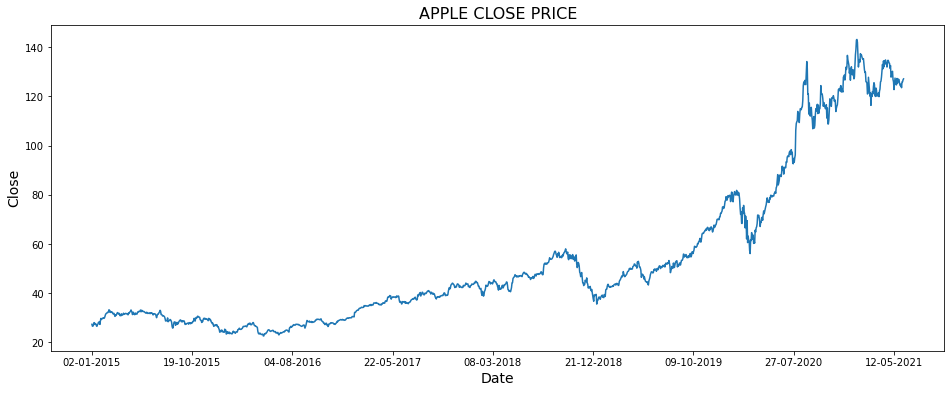

In [29]:
dfr.Close.plot(figsize=(16,6)) 
plt.title("APPLE CLOSE PRICE",fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Close',fontsize=14)
plt.show()

### Splitting the Data

In [30]:
df_X=dfr.loc[:,dfr.columns != 'Close']
df_Y=dfr['Close']

In [31]:
t=.8 
t = int(t*len(dfr)) 
# Train dataset 
X_train = df_X[:t] 
y_train = df_Y[:t]  
# Test dataset 
X_test = df_X[t:] 
y_test = df_Y[t:]

In [32]:
print(X_train.head())
print(y_train.head())

               Volume     Open     High      Low  compound  negative  neutral  \
Date                                                                            
02-01-2015  212575080  27.8475  27.8600  26.8375    0.9875     0.041    0.849   
05-01-2015  256843520  27.0725  27.1625  26.3525    0.9979     0.033    0.807   
06-01-2015  262729000  26.6350  26.8575  26.1575    0.8779     0.049    0.883   
07-01-2015  159933400  26.8000  27.0500  26.6737   -0.8225     0.076    0.862   
08-01-2015  236675040  27.3075  28.0375  27.1750    0.9973     0.039    0.828   

            positive  subjectivity  polarity  
Date                                          
02-01-2015     0.110      0.527698  0.140552  
05-01-2015     0.159      0.447602  0.129695  
06-01-2015     0.068      0.347794  0.108243  
07-01-2015     0.062      0.410056  0.125090  
08-01-2015     0.132      0.400757  0.136965  
Date
02-01-2015    27.3325
05-01-2015    26.5625
06-01-2015    26.5650
07-01-2015    26.9375
08-01-2015

In [33]:
X_train.shape

(1296, 10)

In [34]:
X_test.shape

(324, 10)

### Prediction

In [35]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [36]:
print(regressor.coef_)

[-1.74840610e-10 -5.74306750e-01  8.03381710e-01  7.70747882e-01
  7.20540323e-03  6.12662998e+00  5.98531693e+00  6.42789820e+00
 -7.63073562e-02  6.20336369e-02]


In [37]:
print(regressor.intercept_)

-5.988545916652903


In [38]:
predicted=regressor.predict(X_test)

In [39]:
print(X_test)

               Volume      Open      High       Low  compound  negative  \
Date                                                                      
27-02-2020  320605520   70.2750   71.5000   68.2400   -0.9209     0.089   
28-02-2020  426884800   64.3150   69.6025   64.0925    0.8441     0.047   
02-03-2020  341397360   70.5700   75.3600   69.4300    0.8747     0.091   
03-03-2020  319475400   75.9175   76.0000   71.4500    0.9946     0.065   
04-03-2020  219178280   74.1100   75.8500   73.2825    0.9699     0.060   
...               ...       ...       ...       ...       ...       ...   
03-06-2021   76229170  124.6800  124.8500  123.1300    0.9945     0.042   
04-06-2021   75169340  124.0700  126.1600  123.8500    0.9939     0.024   
07-06-2021   71057550  126.1700  126.3200  124.8321    0.9988     0.020   
08-06-2021   74403770  126.6000  128.4600  126.2101    0.9975     0.027   
09-06-2021   56877940  127.2100  127.7500  126.5200    0.9928     0.034   

            neutral  pos

In [40]:
predicted.shape

(324,)

In [41]:
dframe=pd.DataFrame(y_test,predicted)

In [42]:
dframe=pd.DataFrame({'Actual Price':y_test,'Predicted Price':predicted})

In [43]:
accuracy=regressor.score(X_test,y_test)
print('Accuracy:',accuracy*100)

Accuracy: 99.82250451112434


In [44]:
dframe.head()

,Actual Price,Predicted Price
Date,,
27-02-2020,68.3800,69.630138
28-02-2020,68.3400,68.310336
02-03-2020,74.7025,73.500215
03-03-2020,72.3300,72.518162
04-03-2020,75.6850,74.857896


In [45]:
dframe.tail()

,Actual Price,Predicted Price
Date,,
03-06-2021,123.54,123.617650
04-06-2021,125.89,125.561682
07-06-2021,125.90,125.256431
08-06-2021,126.74,127.792806
09-06-2021,127.13,127.102121


In [46]:
print('Mean Absoluter Error:', metrics.mean_absolute_error(y_test,predicted))

Mean Absoluter Error: 0.7107710034520885


In [47]:
error = mean_squared_error(y_test,predicted)
print('Mean Squared Error:',error)

Mean Squared Error: 0.9654660173407767


In [48]:
graph=dframe.head(20)

<AxesSubplot:xlabel='Date'>

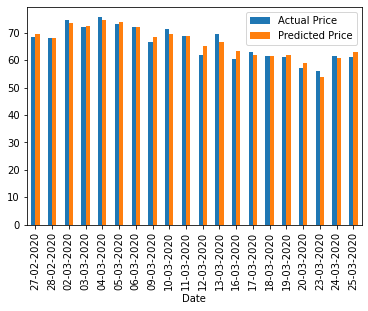

In [49]:
graph.plot(kind='bar')

Text(0, 0.5, 'Close')

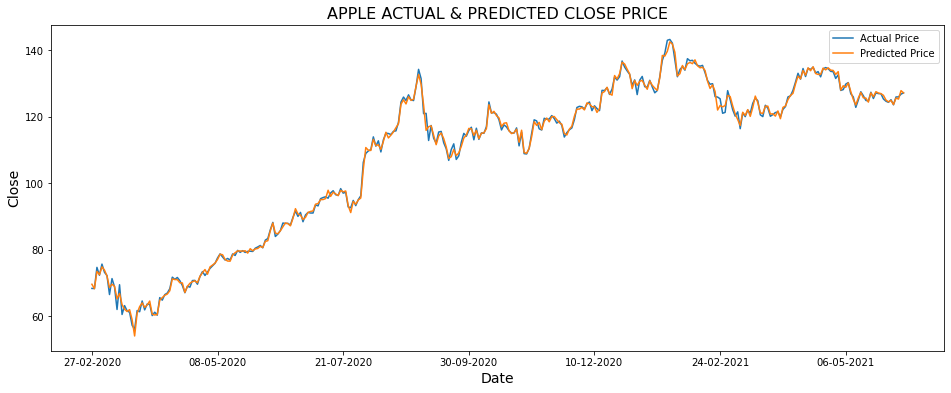

In [50]:
dframe.plot(figsize=(16,6))
plt.title("APPLE ACTUAL & PREDICTED CLOSE PRICE",fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Close',fontsize=14)

In [51]:
import pickle 
pickle_out = open("model.pkl", mode = "wb") 
pickle.dump(regressor, pickle_out) 
pickle_out.close()

_______________________________________________________________________________________________________________________________